In [44]:
import numba as nb
import numpy as np
import os
import matplotlib.pyplot as plt
import cython

In [45]:
%reload_ext Cython
os.environ['NUMBA_NUM_THREADS'] = '10'

In [8]:
@nb.jit(nopython=False) 
def movingAverage(y, window=7):
   result = np.zeros_like(y)
   for i in range(window, y.size):
       result[i] = y[i-window:i].mean()
   return result
x = np.linspace(0, 20, 10000)
y = np.sin(x)+np.random.randn(x.size)/4

In [26]:
@nb.jit(nopython=True) 
def movingAverage_no_python(y, window=7):
   result = np.zeros_like(y)
   for i in range(window, y.size):
       result[i] = y[i-window:i].mean()
   return result
x = np.linspace(0, 20, 10000)
y = np.sin(x)+np.random.randn(x.size)/4

In [35]:
movingAverageNunba = movingAverage_no_python(y)

In [31]:
%timeit -r5 -n10 movingAverage(y)
%timeit -r5 -n10 movingAverage_no_python(y)


598 µs ± 76.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
482 µs ± 116 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


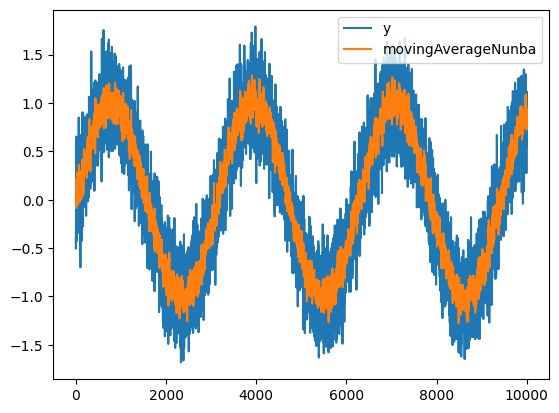

In [41]:
# plot the results 
plt.plot(y, label='y')
plt.plot(movingAverageNunba, label='movingAverageNunba')
plt.legend()

In [51]:

def py_dot(v1, v2):
   return sum(x*y for x, y in zip(v1, v2))

def np_dot(v1, v2):
   return np.dot(v1, v2)

In [73]:
%%cython
def fast_dot(v1, v2):
   cdef double result = 0.0
   cdef float x, y
   for x, y in zip(v1, v2):
        result += x * y
   return result

In [77]:
n = 1000
print("With numpy arrays: \n")
v1 = np.random.uniform(size=n)
v2 = np.random.uniform(size=n)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)
print("\n With Python lists: \n")
v1 = list(v1)
v2 = list(v2)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)

With numpy arrays: 

104 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.02 µs ± 4.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
51.5 µs ± 75.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

 With Python lists: 

70.4 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
58.3 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
16.6 µs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [78]:
n = 1_000_000
print("With numpy arrays: \n")
v1 = np.random.uniform(size=n)
v2 = np.random.uniform(size=n)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)
print("\n With Python lists: \n")
v1 = list(v1)
v2 = list(v2)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)

With numpy arrays: 

103 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
472 µs ± 386 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
50.7 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

 With Python lists: 

74.3 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
56.1 ms ± 73.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.9 ms ± 7.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
n = 10_000_000
print("With numpy arrays: \n")
v1 = np.random.uniform(size=n)
v2 = np.random.uniform(size=n)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)
print("\n With Python lists: \n")
v1 = list(v1)
v2 = list(v2)
%timeit py_dot(v1, v2)
%timeit np_dot(v1, v2)
%timeit fast_dot(v1, v2)

With numpy arrays: 

1.03 s ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.9 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
508 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 With Python lists: 

706 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
556 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
171 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
py_dot(v1, v2), np_dot(v1, v2), fast_dot(v1, v2)

(253.07050733112447, 253.07050733112425, 253.07050764153246)